# CREDIT SCORING WITH MACHINE LEARNING

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading data

df=pd.read_excel('german credit dataset_Projet.xlsx')

In [3]:
# Dataset dimensions

df.shape

(1000, 16)

In [4]:
# Data exploration

df.head()

,Solde du compte courant,Duree de credit (en mois),Historique des credits,Motif,Montant du credit,Compte d'epargne / obligations,Employe depuis,Statut personnel et sexe,Autres debiteurs / garants,Residence actuelle depuis,Age,Logement,Nombre de credits existants dans cette banque,Emploi,Nombre de personnes à charge,Statut
0,1,6,4,3,1169,5,5,3,1,4,67,2,2,3,1,1
1,2,48,2,3,5951,1,3,2,1,2,22,2,1,3,1,2
2,4,12,4,6,2096,1,4,3,1,3,49,2,1,2,2,1
3,1,42,2,2,7882,1,4,3,3,4,45,3,1,3,2,1
4,1,24,3,0,4870,1,3,3,1,4,53,3,2,3,2,2


## Data cleaning

In [5]:
# Changing values of target column (statut) from 1 and 2 to 0 and 1
# note that statut = 0 means good loan and Statut = 1 means bad loan

for i in range(df.shape[0]):
    if df.loc[i,'Statut']==1 :
        df.loc[i,'Statut']=0
    else :
        df.loc[i,'Statut']=1

In [6]:
# Checking changes are done

df['Statut'].unique()

array([0, 1], dtype=int64)

In [7]:
# Description for dataset's columns

df.describe()

,Solde du compte courant,Duree de credit (en mois),Historique des credits,Motif,Montant du credit,Compte d'epargne / obligations,Employe depuis,Statut personnel et sexe,Autres debiteurs / garants,Residence actuelle depuis,Age,Logement,Nombre de credits existants dans cette banque,Emploi,Nombre de personnes à charge,Statut
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.710000,3271.258000,2.105000,3.384000,2.68200,1.145000,2.845000,35.546000,1.929000,1.407000,2.904000,1.155000,0.300000
std,1.257638,12.058814,1.08312,2.484366,2822.736876,1.580023,1.208306,0.70808,0.477706,1.103718,11.375469,0.531264,0.577654,0.653614,0.362086,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,1.000000,3.000000,2.00000,1.000000,2.000000,27.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,1.000000,3.000000,3.00000,1.000000,3.000000,33.000000,2.000000,1.000000,3.000000,1.000000,0.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,3.000000,5.000000,3.00000,1.000000,4.000000,42.000000,2.000000,2.000000,3.000000,1.000000,1.000000
max,4.000000,72.000000,4.00000,9.000000,18424.000000,5.000000,5.000000,4.00000,3.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,1.000000


In [8]:
# Types of dataset's columns

df.dtypes

Solde du compte courant                          int64
Duree de credit (en mois)                        int64
Historique des credits                           int64
Motif                                            int64
Montant du credit                                int64
Compte d'epargne / obligations                   int64
Employe depuis                                   int64
Statut personnel et sexe                         int64
Autres debiteurs / garants                       int64
Residence actuelle depuis                        int64
Age                                              int64
Logement                                         int64
Nombre de credits existants dans cette banque    int64
Emploi                                           int64
Nombre de personnes à charge                     int64
Statut                                           int64
dtype: object

In [9]:
# Searching for missing values and as w see there's no missing values in this dataset

df.isna().sum()

Solde du compte courant                          0
Duree de credit (en mois)                        0
Historique des credits                           0
Motif                                            0
Montant du credit                                0
Compte d'epargne / obligations                   0
Employe depuis                                   0
Statut personnel et sexe                         0
Autres debiteurs / garants                       0
Residence actuelle depuis                        0
Age                                              0
Logement                                         0
Nombre de credits existants dans cette banque    0
Emploi                                           0
Nombre de personnes à charge                     0
Statut                                           0
dtype: int64

In [10]:
# Counting of good loan and bad loan

df['Statut'].value_counts()

0    700
1    300
Name: Statut, dtype: int64

## Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280B481F348>,
      dtype=object)

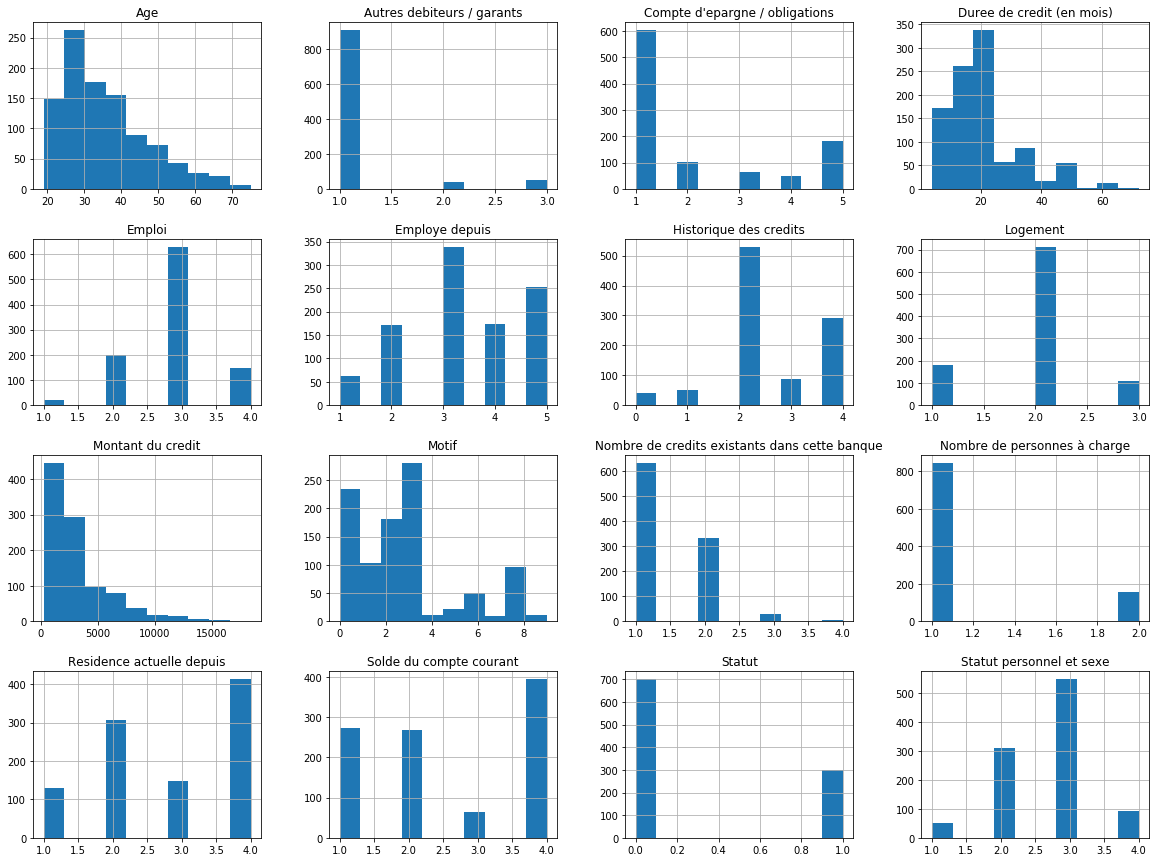

In [11]:
# Histograms for all data columns

df.hist(figsize=(20,15))

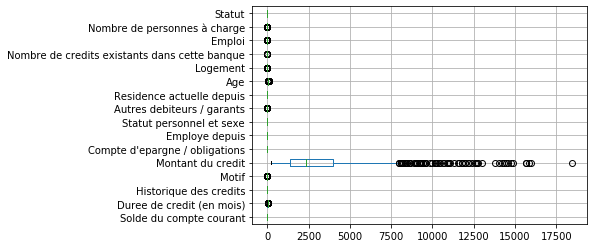

In [12]:
# Generating Boxplot for all data columns to see if the columns are in the same scale or not to 
# By analazing boxplot 90% of columns are in the same scale so no matter to data preprocessing

df.boxplot(vert=False)

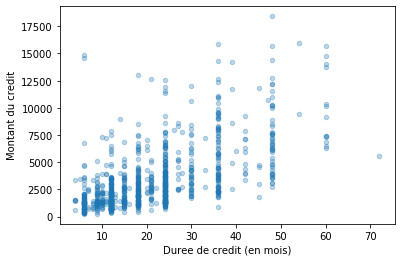

In [13]:
# Relationship between credit duration and credit amount

df.plot(kind='scatter',x='Duree de credit (en mois)',y='Montant du credit',alpha=0.3)

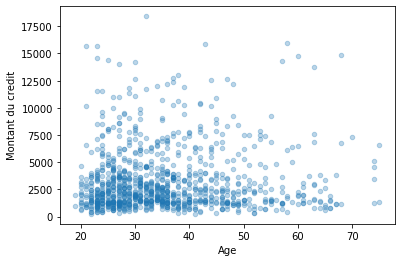

In [14]:
# Relationship between age and credit amount

df.plot(kind='scatter',x='Age',y='Montant du credit',alpha=0.3)

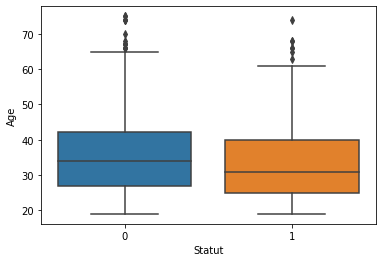

In [15]:
# Age's distribution between two categories good and bad loan
# As we see there's no difference of age between good costumer and bad costumer

sns.boxplot(x='Statut', y='Age', data=df)

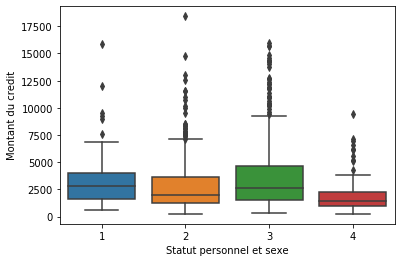

In [16]:
# Credit amount's ditribution for every categorie of presonnel status

sns.boxplot(x='Statut personnel et sexe', y='Montant du credit', data=df)

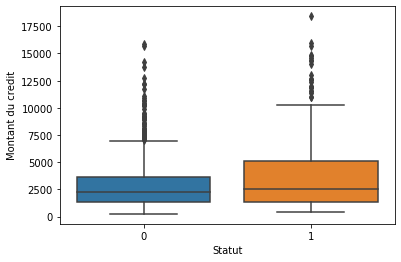

In [17]:
# Credit amount distribution between good and bad loan
# The plot shows that the two categories have the same median 

sns.boxplot(x='Statut', y='Montant du credit', data=df)

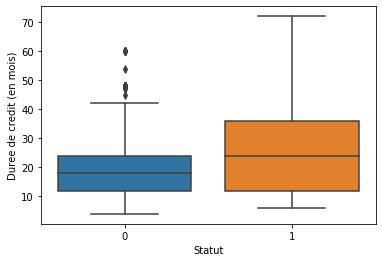

In [18]:
# Credit duration's distribution between good and bad loan
# Bad costumer had credit duration more longer than good costumer 

sns.boxplot(x='Statut', y='Duree de credit (en mois)', data=df)

## Data correlation

In [19]:
# Correlation between numerique variables

df.iloc[:,[1,4,9,10,12,14,15]].corr()

,Duree de credit (en mois),Montant du credit,Residence actuelle depuis,Age,Nombre de credits existants dans cette banque,Nombre de personnes à charge,Statut
Duree de credit (en mois),1.000000,0.624984,0.034067,-0.036136,-0.011284,-0.023834,0.214927
Montant du credit,0.624984,1.000000,0.028926,0.032716,0.020795,0.017142,0.154739
Residence actuelle depuis,0.034067,0.028926,1.000000,0.266419,0.089625,0.042643,0.002967
Age,-0.036136,0.032716,0.266419,1.000000,0.149254,0.118201,-0.091127
Nombre de credits existants dans cette banque,-0.011284,0.020795,0.089625,0.149254,1.000000,0.109667,-0.045732
Nombre de personnes à charge,-0.023834,0.017142,0.042643,0.118201,0.109667,1.000000,-0.003015
Statut,0.214927,0.154739,0.002967,-0.091127,-0.045732,-0.003015,1.000000


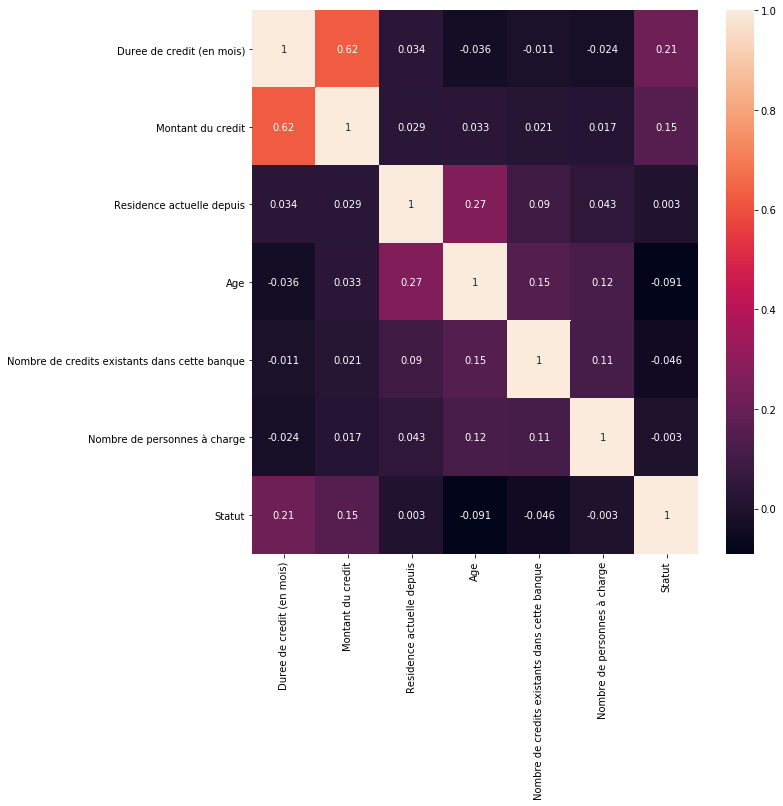

In [20]:
# plotting the correlogram 
# Credit amount and credit duration are the most correlated variables
# credit duration is the most correlated column with status but it still low (0.21)

cor=df.iloc[:,[1,4,9,10,12,14,15]].corr()
plt.figure(figsize = (10,10))
sns.heatmap(data=cor,annot=True)

## Machine learning models

In [21]:
# Determination of Features and target column

x=df.iloc[:,0:15].values
y=df.iloc[:,15].values

In [22]:
# Preparing train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
# Train and test dimensions

print(len(x_train),' data for training and ',len(x_test),' data for testing')

800  data for training and  200  data for testing


In [24]:
# Creating list containing different classifier to use for building machine learning models

l=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),LinearDiscriminantAnalysis(),
   GaussianNB(),SVC(),RandomForestClassifier(n_estimators=100)]

In [25]:
# Building machine learning models and checking the performances of each one 

n=0
p=1
m=None
for z in l:
    
    z.fit(x_train,y_train)
    print('Accuracy of '+str(z).split(sep='(')[0]+' classifier on training set: {:.2f}'
     .format(z.score(x_train, y_train)))
    print('Accuracy of '+str(z).split(sep='(')[0]+' classifier on test set: {:.2f}'
     .format(z.score(x_test, y_test)))
    preds=z.predict(x_test)
    rmse=np.sqrt(np.mean(preds-y_test)**2)
    print('RMSE of '+str(z).split(sep='(')[0]+' classifier on test set: '+str(rmse))
    print('Confusion matrix of '+str(z).split(sep='(')[0]+' classifier:')
    print(confusion_matrix(y_test,preds))
    print('')
    s=accuracy_score(y_test,preds)
    if s > n :
        n=s
        c1=z
    if rmse < p:
        p=rmse
        c2=z

C:\Users\hamdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of LogisticRegression classifier on training set: 0.76
Accuracy of LogisticRegression classifier on test set: 0.70
RMSE of LogisticRegression classifier on test set: 0.065
Confusion matrix of LogisticRegression classifier:
[[119  23]
 [ 36  22]]

Accuracy of DecisionTreeClassifier classifier on training set: 1.00
Accuracy of DecisionTreeClassifier classifier on test set: 0.67
RMSE of DecisionTreeClassifier classifier on test set: 0.01
Confusion matrix of DecisionTreeClassifier classifier:
[[110  32]
 [ 34  24]]

Accuracy of KNeighborsClassifier classifier on training set: 0.76
Accuracy of KNeighborsClassifier classifier on test set: 0.65
RMSE of KNeighborsClassifier classifier on test set: 0.095
Confusion matrix of KNeighborsClassifier classifier:
[[116  26]
 [ 45  13]]

Accuracy of LinearDiscriminantAnalysis classifier on training set: 0.77
Accuracy of LinearDiscriminantAnalysis classifier on test set: 0.72
RMSE of LinearDiscriminantAnalysis classifier on test set: 0.04
Confu

In [26]:
# Determining the best model based on accuracy score

print('The best accuracy score is '+str(n))
print('The best classifier based on accuracy score is '+str(c1).split(sep='(')[0])

The best accuracy score is 0.75
The best classifier based on accuracy score is RandomForestClassifier


In [27]:
# Determining the best model based on RMSE

print('The best RMSE is '+str(p))
print('The best classifier based on RMSE is '+str(c2).split(sep='(')[0])

The best RMSE is 0.01
The best classifier based on RMSE is DecisionTreeClassifier


In [28]:
# Building dataframe for all models and their performances to create comparative analysis
# between models

tab=pd.DataFrame(columns=['Classifier','acc_train','acc_test','acc_score','rmse'])
for z in l:
    a=z.score(x_train,y_train)
    b=z.score(x_test,y_test)
    preds=z.predict(x_test)
    c=accuracy_score(y_test,preds)
    d=np.sqrt(np.mean(preds-y_test)**2)
    tab=tab.append({'Classifier':str(z).split(sep='(')[0],'acc_train':a,'acc_test':b,
                    'acc_score':c,'rmse':d},ignore_index = True)

In [29]:
tab

,Classifier,acc_train,acc_test,acc_score,rmse
0,LogisticRegression,0.75750,0.705,0.705,0.065
1,DecisionTreeClassifier,1.00000,0.670,0.670,0.010
2,KNeighborsClassifier,0.76250,0.645,0.645,0.095
3,LinearDiscriminantAnalysis,0.76875,0.720,0.720,0.040
4,GaussianNB,0.76250,0.715,0.715,0.025
5,SVC,0.71000,0.715,0.715,0.255
6,RandomForestClassifier,1.00000,0.750,0.750,0.070


In [30]:
# Trying to get predictions for test set

predictions=c1.predict(x_test)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [31]:
# Predicting Status for new data 

c1.predict([[2,42,2,3,5951,1,3,2,1,2,22,2,1,3,1]])[0]

1

In [32]:
# Getting probabilities (good and bad) for new data 

c1.predict_proba([[2,42,2,3,5951,1,3,2,1,2,22,2,1,3,1]])[0]

array([0.35, 0.65])

In [33]:
# Probabilities for predicted status

prob=c1.predict_proba(x_test)
prob

array([[0.41, 0.59],
       [0.67, 0.33],
       [0.89, 0.11],
       [0.72, 0.28],
       [0.69, 0.31],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.35, 0.65],
       [0.3 , 0.7 ],
       [0.47, 0.53],
       [0.65, 0.35],
       [0.61, 0.39],
       [0.54, 0.46],
       [0.57, 0.43],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.47, 0.53],
       [0.82, 0.18],
       [0.57, 0.43],
       [0.39, 0.61],
       [0.51, 0.49],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.38, 0.62],
       [0.92, 0.08],
       [0.81, 0.19],
       [0.88, 0.12],
       [0.29, 0.71],
       [0.75, 0.25],
       [0.88, 0.12],
       [0.74, 0.26],
       [0.65, 0.35],
       [0.83, 0.17],
       [0.23, 0.77],
       [0.89, 0.11],
       [0.85, 0.15],
       [0.48, 0.52],
       [0.89, 0.11],
       [0.78, 0.22],
       [0.36, 0.64],
       [0.68, 0.32],
       [0.84, 0.16],
       [0.85, 0.15],
       [0.3 , 0.7 ],
       [0.45, 0.55],
       [0.46,

In [34]:
# Creating dataframe containing actual and predicted status and their probabilities
# to be goog and to be bad 

prediction_prob=pd.DataFrame(prob,columns=['Prob_0','Prob_1'])
prediction_target=pd.DataFrame(predictions,columns=['Predicted_target'])
actual_target=pd.DataFrame(y_test,columns=['Actual_target'])
df1=pd.concat([actual_target,prediction_prob,prediction_target],axis=1)
df1.sort_values('Prob_0',ascending=False)

,Actual_target,Prob_0,Prob_1,Predicted_target
194,0,0.98,0.02,0
127,0,0.98,0.02,0
88,0,0.98,0.02,0
65,0,0.97,0.03,0
153,1,0.97,0.03,0
...,...,...,...,...
74,0,0.24,0.76,1
35,1,0.23,0.77,1
60,1,0.17,0.83,1
175,1,0.15,0.85,1


In [35]:
# Trying to get the minimum probability for a loan to be good
good_loan=df1[df1['Predicted_target']==0]
min(good_loan['Prob_0'])

0.5

## Dashboard

In [38]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install jupyter-dash

Note: you may need to restart the kernel to use updated packages.


In [40]:
# Importing libraries for dashboard

from jupyter_dash import JupyterDash
from dash import Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px

In [41]:
# Creating function to display a table

def generate_table(dataframe, max_rows=10):
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    ])

In [42]:
# Dashboard creation

app = Dash(__name__)
colors = {
    'background': '#7FDBFF',
    'text': '#0B15EA'
}
df['Statut']=df['Statut'].astype(str)
app.layout=html.Div(children=[
    html.H1('CREDIT SCORING DASHBOARD', style={
            'textAlign': 'center',
            'color': colors['text']
        }),
    html.H2('Data Visualization', style={
            'textAlign': 'center',
            'color': colors['text']
        }),
    
    html.Br(),
    html.Br(),
    
     
    dcc.Dropdown(
            id='my_dropdown1',
            options=[
                     {'label': 'Solde du compte courant', 'value': 1 },
                     {'label': 'Duree de credit (en mois)', 'value': 2 },
                     {'label': 'Historique des credits', 'value': 3 },
                     {'label': 'Motif', 'value': 4 },
                     {'label': 'Montant du credit', 'value': 5 },
                     {'label': 'Employe depuis', 'value': 7 },
                     {'label': 'Statut personnel et sexe', 'value': 8 },
                     {'label': 'Autres debiteurs / garants', 'value': 9 },
                     {'label': 'Residence actuelle depuis', 'value': 10 },
                     {'label': 'Age', 'value': 11 },
                     {'label': 'Logement', 'value': 12 },
                     {'label': 'Nombre de credits existants dans cette banque', 'value': 13 },
                     {'label': 'Emploi', 'value': 14 },
                     {'label': 'Nombre de personnes à charge', 'value': 15 },
                     {'label': 'Statut', 'value': 16 }
                    
            ],
            value='16',
            multi=False,
        
            style={"width": "100%"},
            placeholder='Select a column'
        ),
    dcc.Graph(
            id='graph1',
        
        ),
    
    dcc.Graph(
        
        figure=px.scatter(df,x='Duree de credit (en mois)',y='Montant du credit'
                          ,title='Evolution between credit duration and credit amount '
                          ,color='Statut',color_discrete_sequence=["red", "blue"])
    ),
    
    dcc.Graph(
        
        figure=px.scatter(df,x='Age',y='Montant du credit',title='Credit amount by age '
                          ,color='Statut',color_discrete_sequence=["red", "blue"])
    ),
    
    dcc.Graph(
        
        figure=px.box(df,x='Statut', y='Age'
                      ,title='Age distribution between the two categories good loan and bad loan',
                     points='all',color='Statut')
    ),
    
    dcc.Graph(
        
        figure=px.box(df,x='Statut personnel et sexe', y='Montant du credit'
                      ,title='Distribution of credit amount for differnt personel statut',
                     color='Statut personnel et sexe')
    ),
    
    dcc.Graph(
        
        figure=px.box(df,x='Statut', y='Montant du credit'
                      ,title='Distribution of credit amount for different statut',
                     color='Statut')
    ),
    
    dcc.Graph(
        
        figure=px.box(df,x='Statut', y='Duree de credit (en mois)'
                      ,title='Distribution of credit duration for different statut',
                     color='Statut')
    ),
    
    html.Br(),
    html.Br(),
    
    
    html.H2('Data correlation', style={
            'textAlign': 'center',
            'color': colors['text']
            
        }),
    
    
    dcc.Graph(
        
        figure=px.imshow(cor,width=1335, height=700)
        
    ),
    
    html.H2('Models performances', style={
            'textAlign': 'center',
            'color': colors['text']
            
        }),
    
    html.Br(),
    
    
    generate_table(tab),
    
    html.Br(),
    html.Br(),
    
    
    
    html.H4('The best accuracy score is '+str(n)),
    html.H4('The best classifier based on accuracy score is '+str(c1).split(sep='(')[0]),
    
    html.Br(),
    
    html.H4('The best RMSE is '+str(p)),
    html.H4('The best classifier based on RMSE is '+str(c2).split(sep='(')[0]),
    
    html.Br(),
    html.Br(),
    
   
    
    
    html.H2('Predictions', style={
            'textAlign': 'center',
            'color': colors['text']
            
        }),
    
    html.Br(),
    html.Br(),
    
    html.Label('Select your classifier',style={'font-weight':'bold'}),
    html.Br(),
    dcc.Dropdown(
        id='classifier',
        options=[
            
                     {'label': 'LogisticRegression', 'value': 'LogisticRegression' },
                     {'label': 'DecisionTreeClassifier', 'value': 'DecisionTreeClassifier' },
                     {'label': 'KNeighborsClassifier', 'value': 'KNeighborsClassifier' },
                     {'label': 'LinearDiscriminantAnalysis', 'value': 'LinearDiscriminantAnalysis' },
                     {'label': 'GaussianNB', 'value': 'GaussianNB' },
                     {'label': 'SVC', 'value': 'SVC' },
                     {'label':'RandomForestClassifier' , 'value':'RandomForestClassifier'}
        ],
        value='',
        placeholder='Select your classifier',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    html.Label('Enter customer information',style={'font-weight':'bold'}),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='a',
        options=[
            {'label':i, 'value':i} for i in range(1,5)
        ],
        
        placeholder='Solde compte courant',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='z',
        options=[
            {'label':i, 'value':i} for i in range(1,121)
        ],
        
        placeholder='Duree de credit (en mois)',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='e',
        options=[
            {'label':i, 'value':i} for i in range(5)
        ],
        
        placeholder='Historique des credits',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='r',
        options=[
            {'label':i, 'value':i} for i in range(9)
        ],
        
        placeholder='Motif',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    html.Label('Montant de credit'),
    dcc.Input(id='t', value='', type='text'),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='y',
        options=[
            {'label':i, 'value':i} for i in range(1,6)
        ],
        
        placeholder='Compte d epargne / obligations',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='u',
        options=[
            {'label':i, 'value':i} for i in range(1,6)
        ],
        
        placeholder='Employe depuis',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='i',
        options=[
            {'label':i, 'value':i} for i in range(1,5)
        ],
        
        placeholder='Statut personnel et sexe',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='o',
        options=[
            {'label':i, 'value':i} for i in range(1,4)
        ],
        
        placeholder='Autres debiteurs / garants',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='p',
        options=[
            {'label':i, 'value':i} for i in range(1,5)
        ],
        
        placeholder='Residence actuelle depuis',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='q',
        options=[
            {'label':i, 'value':i} for i in range(18,81)
        ],
        
        placeholder='Age',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='s',
        options=[
            {'label':i, 'value':i} for i in range(1,4)
        ],
        
        placeholder='Logement',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='d',
        options=[
            {'label':i, 'value':i} for i in range(1,5)
        ],
        
        placeholder='Nombre de credits existants dans cette banque',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='f',
        options=[
            {'label':i, 'value':i} for i in range(1,5)
        ],
        
        placeholder='Emploi',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    dcc.Dropdown(
        id='g',
        options=[
            {'label':i, 'value':i} for i in range(1,3)
        ],
        
        placeholder='Nombre de personnes à charge',
        style={"width": "50%"}
    ),
    
    html.Br(),
    html.Br(),
    
    
    html.Button('Predict', id='button', n_clicks=0),
    
    
    html.Br(),
    html.Br(),
    
    html.Div(id='prediction'),
    
    
    html.Br(),
    html.Br(),
    
    
    
    html.Br(),
    html.Br(),
    
])




@app.callback(
    Output(component_id='graph1', component_property='figure'),
    Input(component_id='my_dropdown1', component_property='value')
)
def update_graph(my_dropdown1):
    if my_dropdown1==1:
        col='Solde du compte courant'
    elif my_dropdown1==2:
        col='Duree de credit (en mois)'
    elif my_dropdown1==3:
        col='Historique des credits'
    elif my_dropdown1==4:
        col='Motif'
    elif my_dropdown1==5:
        col='Montant du credit'
    elif my_dropdown1==7:
        col='Employe depuis'
    elif my_dropdown1==8:
        col='Statut personnel et sexe'
    elif my_dropdown1==9:
        col='Autres debiteurs / garants'
    elif my_dropdown1==10:
        col='Residence actuelle depuis'
    elif my_dropdown1==11:
        col='Age'
    elif my_dropdown1==12:
        col='Logement'
    elif my_dropdown1==13:
        col='Nombre de credits existants dans cette banque'
    elif my_dropdown1==14:
        col='Emploi'
    elif my_dropdown1==15:
        col='Nombre de personnes à charge'
    elif my_dropdown1==16:
        col='Statut'
       
    fig=px.histogram(df,x=col,nbins=10,title='Histogram of data features'
                     ,color_discrete_sequence=['red'])
    return (fig)



@app.callback(
    Output('prediction', 'children'),
    Input('button', 'n_clicks'),
    State('classifier','value'),
    State('a','value'),
    State('z','value'),
    State('e','value'),
    State('r','value'),
    State('t','value'),
    State('y','value'),
    State('u','value'),
    State('i','value'),
    State('o','value'),
    State('p','value'),
    State('q','value'),
    State('s','value'),
    State('d','value'),
    State('f','value'),
    State('g','value'),
    
)  
def predict(n_clicks,classifier,a,z,e,r,t,y,u,i,o,p,q,s,d,f,g):
    if classifier=='LogisticRegression':
            cl=LogisticRegression()
            
    elif  classifier=='DecisionTreeClassifier':
            cl=DecisionTreeClassifier()
            
    elif  classifier=='KNeighborsClassifier':
            cl=KNeighborsClassifier()
            
    elif  classifier=='LinearDiscriminantAnalysis':
            cl=LinearDiscriminantAnalysis()
            
    elif  classifier=='GaussianNB':
            cl=GaussianNB()
            
    elif  classifier=='SVC':
            cl=SVC()
            
    elif  classifier=='RandomForestClassifier':
            cl=RandomForestClassifier()
    
    
    k=np.array([[a,z,e,r,t,y,u,i,o,p,q,s,d,f,g]])
    cl.fit(x_train,y_train)
    pred=cl.predict(k)
    prediction=pred[0]
    proba=cl.predict_proba(k)
    proba0=int((proba[0][0])*100)
    proba1=int((proba[0][1])*100)
    if prediction==0:
        output='Prediction : '+str(prediction)+ ' ==> Good loan with probability '+str(proba0)+' %'
    else:
        output='Prediction : '+str(prediction)+' ==> Bad loan with probability '+str(proba1)+' %'
        
    return (output)
        
            



app.run_server() 

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
